# Activity Plotting

For a project I was doing, time of year and day of week, or even time or day and day of week, where really important to visualise. A simple time series is great, but it doesn't necessarily illumate what is going on. Think about how easy it would be on a time series to see if activity was highest at 11am pm Thursdays.

Thus in reponse, a colleague suggested plotting something like github activity tracker. For those of you who don't know what I'm talking about, its the grid with days of the week on the yaxis and the xaxis is the time in the year by week. Thus its approximatly a grid 7 rows by 52 columns. The color of each box in the grid is determined by the intensity of activity on the day.

I've looked to see if any python libraries excist to plot this, and supprisingly there aren't any. The closest I've come is a waffle chart library. Thus I have russled up this code, and it does the job nicely. I have only used it in Notebooks so far, but it could be nice to make it into my own api.

I have divided the viewing angles as "time of year" - "day of week" and also "time of day" - "day of week". I have written two functions, one which addresses each point.

In [1]:
import numpy as np
import pandas as pd

import calendar 
import time
import datetime
from datetime import datetime, timedelta

import matplotlib.pyplot as plt

## Charting "time of year" and "day of week"

First up is the time of the year and day of the week. We make a numpy array, which has the dates over a period, and also some acitivites, which have been made according to a random distribution.

In [2]:
# timeline 
t = np.arange(datetime(2014,7,1), datetime(2015,7,1), timedelta(days=1)).astype(datetime)
m = t.size
t = t.reshape(m, 1)

# activity values
a = 100*np.random.rand(m, 1)

# stact both together
activity = np.column_stack((t,a))

Then we define the function, which has the activity as an input along iwth some choices of whether to plot a colour bar or not, or weekday lables on the y axis, and month lables on the y axis.

The main difficultly, albeit only small, is that we have to set up the grid. This takes some work, as you see.

In [3]:
def activityplot_weekday(activity, colorbar=True, weekdaylabels=True, monthlabel=True):
    # find the start day and end day of the period
    start_day = activity[0,0].weekday()
    end_day = activity[-1,0].weekday()
    
    # set the number of rows equal to the number of days in a week
    num_rows = 7
    
    # get the number of activity units, based on number of days in a year
    num_boxes,_ = activity.shape
    
    # total number of boxes incl
    total_num_boxesnum_columns = (start_day) + num_boxes + (6-end_day)
    
    # number of columns
    num_columns = int(total_num_boxesnum_columns / num_rows) 
    
    # set up the plot
    fig = plt.figure(figsize=(15, 2))
    
    # set the colour map colors
    cmap=plt.cm.Reds

    # get the maximum and minimum values
    min_number = activity[:,1].min()
    max_number = activity[:,1].max()
    norm=plt.Normalize(min_number, max_number)

    # get the current axis
    ax = fig.gca()
    
    # turn off all axes
    ax.axis('off')
    
    # get the size of the image
    size = fig.get_size_inches()*fig.dpi
    
    # set the extent of the figure
    ax.set_xlim((0, size[0]))
    ax.set_ylim((0, size[1]))
    
    # set the box dimensions of the nodes based on the smallest dimension
    min_horz_spacing = size[0]/(num_columns+1)
    min_vert_spacing = size[1]/(num_rows+1)
    if min_horz_spacing < min_vert_spacing:
        box_width = 3*min_horz_spacing/4
        spacing = min_horz_spacing
    else:
        box_width = 3*min_vert_spacing/4
        spacing = min_vert_spacing
      
    # set to be a square
    box_height = box_width
    
    # set the week to be zero to start
    week = 0
    
    # cycle through each day over period
    for i, day in enumerate(activity[:,0]):
        weekday = day.weekday()

        # get the x and y for each node center
        x = (week+1)*spacing
        y = (weekday+1)*spacing 
        
        # set the colour of the polygon
        c = cmap((activity[i,1] - min_number)/(max_number - min_number))
        
        # plot the nodes
        box = plt.Rectangle((x,y), box_width, box_height, color=c, zorder=100)
        ax.add_artist(box)
        
        # update the column after sunday
        if weekday == 6:
            week += 1
        
        if weekdaylabels is True:
            monthday = day.day
            month_of_year = day.month
            if weekday == 0 and monthday < 7:
                x_month = x
                y_month = 0
                
                month_dic = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                     7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
                
                ax.annotate('{}'.format(month_dic[month_of_year]), (x_month,y_month), xytext=(3, 0),
                        textcoords="offset points", ha='center', va='bottom')
        
            
    if colorbar is True:
        # seting up the colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array(activity[:,1])
        fig.colorbar(sm, ax=ax, orientation='vertical', shrink=0.75, aspect=5, pad=0.001)
        
    # list of labels for the days of the week
    days_list = ['M', 'T', 'W', 'T', 'F', 'S', 'S']    
    if weekdaylabels is True:
        for j, day in enumerate(days_list):
            y_week = (j+1)*spacing
            x_week = 0
            ax.annotate('{}'.format(day), (x_week,y_week), xytext=(3, 0),
                        textcoords="offset points", ha='center', va='bottom')
    
    plt.show()

Lets plot the data using the function.

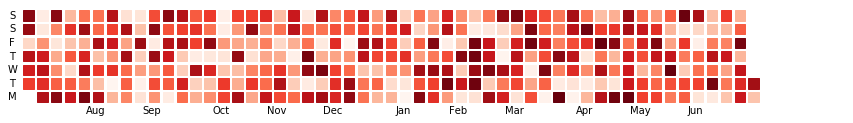

In [4]:
activityplot_weekday(activity, colorbar=False, weekdaylabels=True, monthlabel=True)

Works nicely. Clearly you can't see anything here, as the the data is random, it means that we don't see any trends!

## Charting "time of day" and "day of week"

This is slightly easier, as we don't have to worry so much about the grid. Its really well defined, 24 by 7. Lets define an activity matrix, with the first column is the times, and the second the activity.

In [5]:
# timeline 
t_hr = np.arange(datetime(2014,7,1), datetime(2014,7,8), timedelta(hours=1)).astype(datetime)
m = t_hr.size
t_hr = t_hr.reshape(m, 1)

# activity values
a_hr = 100*np.random.rand(m, 1)

# stact both together
activity_hr = np.column_stack((t_hr,a_hr))

The we define a second function of activity_plot by hour.

In [6]:
def activityplot_hour(activity, colorbar=True, weekdaylabels=True, hourlabel=True):
    # set the number of rows equal to the number of days in a week
    num_rows = 7
    
    # set the number of columns equal to the number of hours in a day
    num_columns = 24
    
    # total number of boxes 
    total_num_boxesnum_columns = num_columns * num_rows
    
    # set up the plot
    fig = plt.figure(figsize=(15, 2))
    
    # set the colour map colors
    cmap=plt.cm.Reds

    # get the maximum and minimum values
    min_number = activity[:,1].min()
    max_number = activity[:,1].max()
    norm=plt.Normalize(min_number, max_number)

    # get the current axis
    ax = fig.gca()
    
    # turn off all axes
    ax.axis('off')
    
    # get the size of the image
    size = fig.get_size_inches()*fig.dpi
    
    # set the extent of the figure
    ax.set_xlim((0, size[0]))
    ax.set_ylim((0, size[1]))
    
    # set the box dimensions of the nodes based on the smallest dimension
    min_horz_spacing = size[0]/(num_columns+1)
    min_vert_spacing = size[1]/(num_rows+1)
    if min_horz_spacing < min_vert_spacing:
        box_width = 3*min_horz_spacing/4
        spacing = min_horz_spacing
    else:
        box_width = 3*min_vert_spacing/4
        spacing = min_vert_spacing
      
    # set to be a square
    box_height = box_width
    
    
    for i, date in enumerate(activity[:,0]):
        weekday = date.weekday()
        hour = date.hour

        # get the x and y for each node center
        x = (hour+1)*spacing
        y = (weekday+1)*spacing 
        
        # set the colour of the polygon
        c = cmap((activity[i,1] - min_number)/(max_number - min_number))
        
        # plot the nodes
        box = plt.Rectangle((x,y), box_width, box_height, color=c, zorder=100)
        ax.add_artist(box)
        
    # list of labels for the days of the week
    days_list = ['M', 'T', 'W', 'T', 'F', 'S', 'S']    
    if weekdaylabels is True:
        for j, day in enumerate(days_list):
            y_week = (j+1)*spacing
            x_week = 0
            ax.annotate('{}'.format(day), (x_week,y_week), xytext=(3, 0),
                        textcoords="offset points", ha='center', va='bottom')
    
    if hourlabel is True:
        for k in list(range(24)):
            x_hr = (k+1)*spacing
            y_hr = 0
            ax.annotate('{}'.format(k), (x_hr,y_hr), xytext=(6, 0),
                        textcoords="offset points", ha='center', va='bottom')
    
    plt.show()

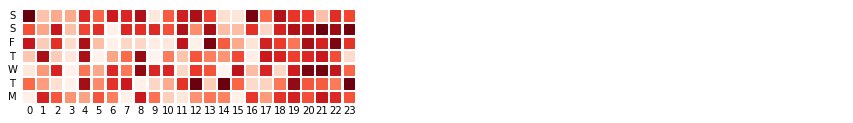

In [7]:
activityplot_hour(activity_hr, colorbar=True, weekdaylabels=True, hourlabel=True)

Looks good. Now just going to find an example I can show in public, showing where I can demo both of these. Thats for another notebook.